In [1]:
# importacion general de librerias y de visualizacion (matplotlib y seaborn)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as datetime
from math import pi
import sys


%matplotlib inline

plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib
#plt.rcParams['figure.figsize'] = (20, 10)

sns.set(style="whitegrid") # seteando tipo de grid en seaborn

pd.options.display.float_format = '{:20,.2f}'.format # suprimimos la notacion cientifica en los outputs


In [2]:
# Cargamos el dataframe
df = pd.read_csv('data/train.csv',
        index_col='id',
        parse_dates=['fecha'])
df['nulls'] = df.isnull().apply(np.sum,axis=1)

In [3]:
nulls = pd.DataFrame(df.isnull().sum().sort_values(ascending=False), columns=['nulls'])
nulls['porcentaje'] = round(100*nulls['nulls'] / len(df), 2)
nulls=nulls[:15]
nulls.reset_index(inplace=True)
nulls.rename(columns={'index':'Campos'},inplace=True)
camposNull=nulls.Campos.tolist()
nulls

,Campos,nulls,porcentaje
0,lng,123488,51.45
1,lat,123488,51.45
2,direccion,53072,22.11
3,metrostotales,51467,21.44
4,antiguedad,43555,18.15
5,garages,37765,15.74
6,idzona,28621,11.93
7,banos,26221,10.93
8,habitaciones,22471,9.36
9,metroscubiertos,17400,7.25


Text(0, 0.5, 'Ciudad')

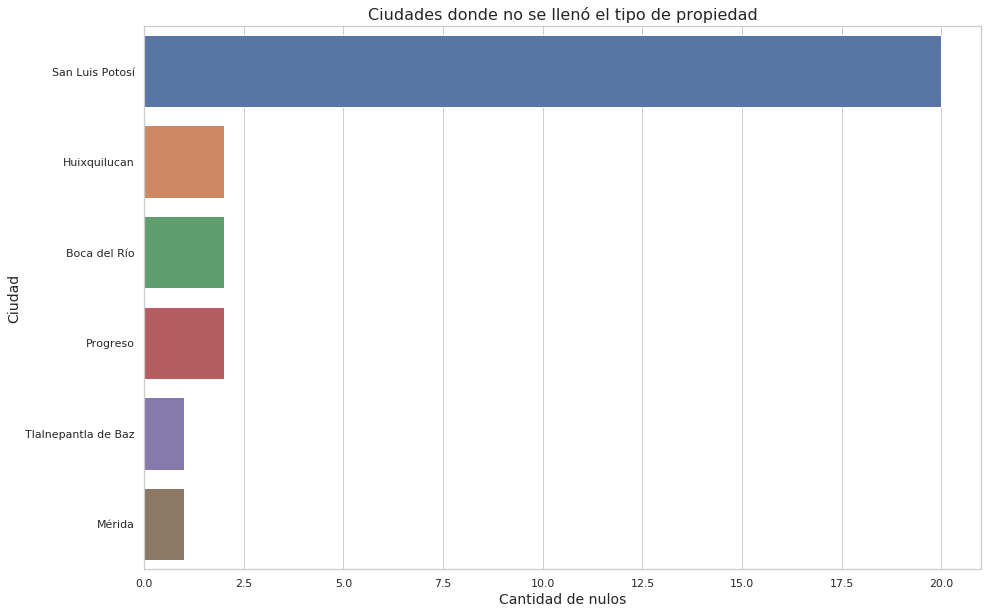

In [4]:
#Quiero descubrir las provincias y las ciudades donde no se lleno el tipo de propiedad
dfTPNull = df[df['tipodepropiedad'].isnull()].groupby(['provincia','ciudad']).size().reset_index()
dfTPNull.rename(columns={0:'cantidad'}, inplace=True)
dfTPNull = dfTPNull.sort_values(by = 'cantidad', ascending=False)
ciudades = list(dfTPNull.ciudad)

plt.figure(figsize=(15, 10))
g = sns.barplot(x=dfTPNull['cantidad'], y=dfTPNull['ciudad'], orient='h')
g.set_title("Ciudades donde no se llenó el tipo de propiedad", fontsize=16)
g.set_xlabel("Cantidad de nulos", fontsize=14)
g.set_ylabel("Ciudad", fontsize=14)

#Mejorar grilla y valores para que den sin coma

Text(0, 0.5, 'Cantidad')

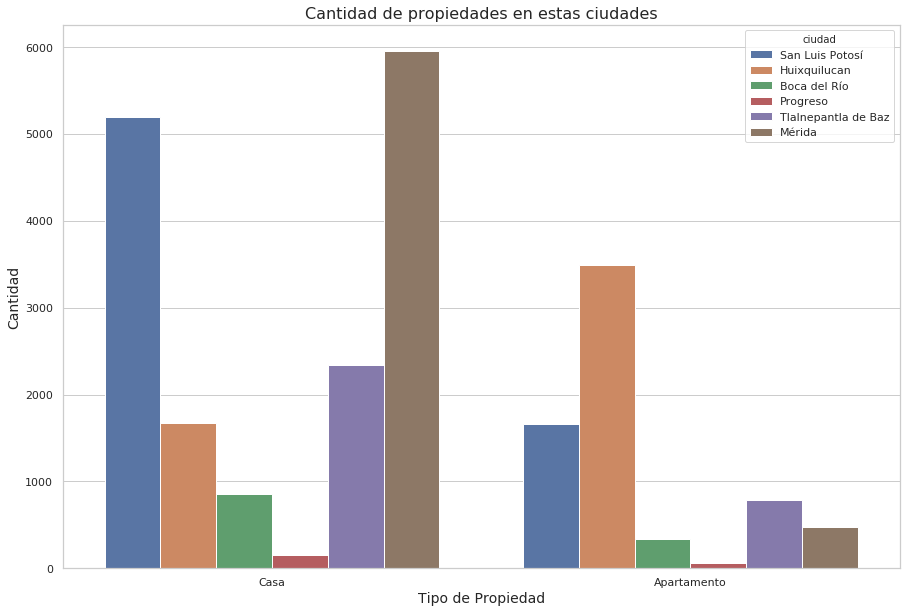

In [5]:
#Quiero ver cual es la propiedad con mayor cantidad que hay en cada una de estas ciudades.
df3 = df.loc[df['ciudad'].isin(ciudades),:]
df3 = df3.groupby(['ciudad','tipodepropiedad']).apply(lambda x: pd.Series(x.shape[0], index=["cantidad"]))
df3.reset_index(inplace=True)
newDf = pd.DataFrame(columns=df3.columns)
for i in ciudades: 
     newDf = newDf.append(df3[df3.ciudad == i].sort_values(by="cantidad", ascending=False)[0:2])

plt.figure(figsize=(15, 10))
g = sns.barplot(x=newDf['tipodepropiedad'], y=newDf['cantidad'], hue=newDf['ciudad'])
g.set_title("Cantidad de propiedades en estas ciudades", fontsize=16)
g.set_xlabel("Tipo de Propiedad", fontsize=14)
g.set_ylabel("Cantidad", fontsize=14)

Text(0, 0.5, 'Provincia')

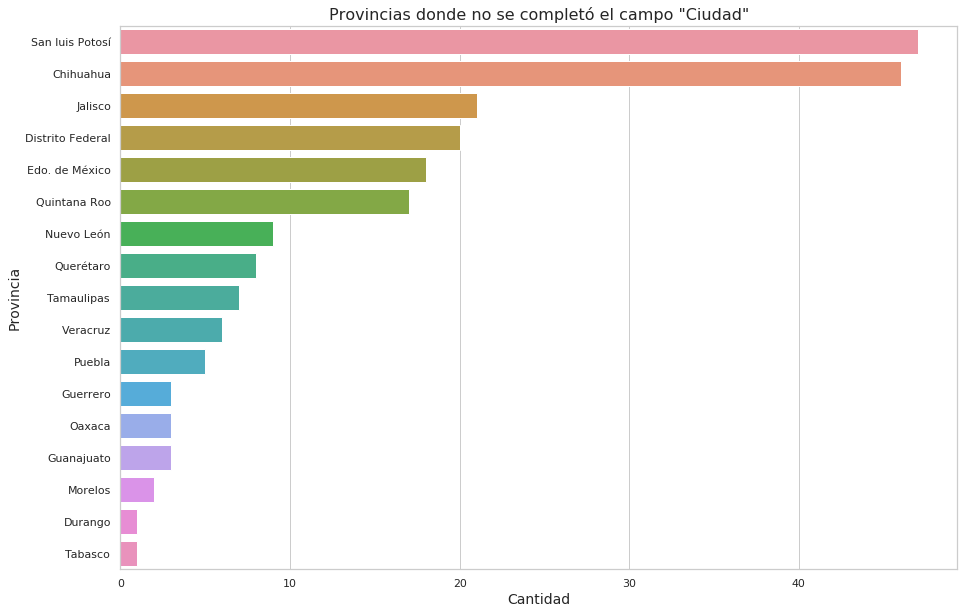

In [6]:
#Quiero ver las provincias donde no completaron el campo:"Ciudad"
dfCiuNull = df[df['ciudad'].isnull()].groupby(['provincia']).size().reset_index()
dfCiuNull.rename(columns={0:'cantidad'}, inplace=True)
dfCiuNull = dfCiuNull.sort_values(by = 'cantidad', ascending=False)
provincia = list(dfCiuNull.provincia)

plt.figure(figsize=(15, 10))
g = sns.barplot(x=dfCiuNull['cantidad'], y=dfCiuNull['provincia'], orient='h')
g.set_title("Provincias donde no se completó el campo \"Ciudad\"", fontsize=16)
g.set_xlabel("Cantidad", fontsize=14)
g.set_ylabel("Provincia", fontsize=14)


#Mejorar grilla y valores para que den sin coma


Text(0, 0.5, 'Provincia')

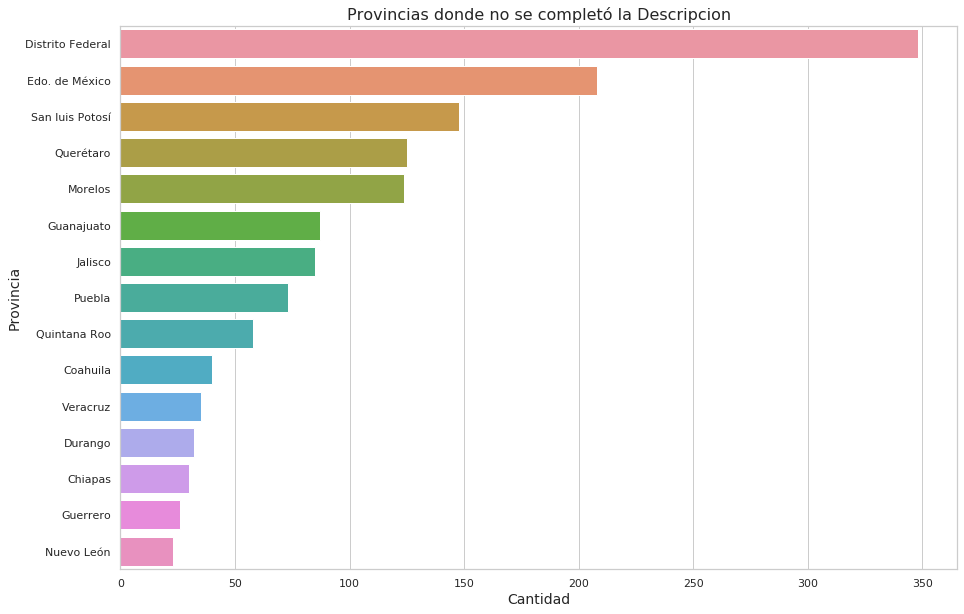

In [7]:
#Quiero ver las ciudades y provincias donde no completaron el campo:"Descripcion"
#Notamos que la provincia con mayor cantidad de omisiones de descripcion es "Distrito federal"
dfDescNull = df[df['descripcion'].isnull()].groupby(['provincia']).size().reset_index()
dfDescNull.rename(columns={0:'cantidad'}, inplace=True)
dfDescNull = dfDescNull.sort_values(by = 'cantidad', ascending=False)[0:15]
provincia = list(dfDescNull.provincia)

plt.figure(figsize=(15, 10))
g = sns.barplot(x=dfDescNull['cantidad'], y=dfDescNull['provincia'], orient='h')
g.set_title("Provincias donde no se completó la Descripcion", fontsize=16)
g.set_xlabel("Cantidad", fontsize=14)
g.set_ylabel("Provincia", fontsize=14)

#Mejorar grilla y valores para que den sin coma

Text(0, 0.5, 'Ciudad')

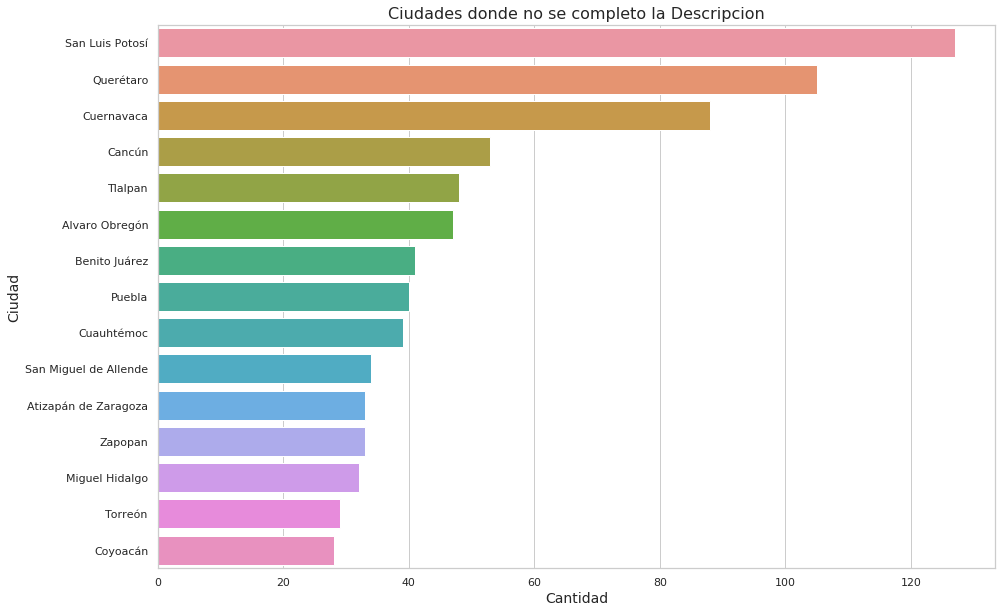

In [8]:
#Quiero ver las ciudades y provincias donde no completaron el campo:"Descripcion"
#Notamos que la ciudad con mayor cantidad de omisiones de descripcion es "San Luis Potosí"
dfDescNull = df[df['descripcion'].isnull()].groupby(['ciudad']).size().reset_index()
dfDescNull.rename(columns={0:'cantidad'}, inplace=True)
dfDescNull = dfDescNull.sort_values(by = 'cantidad', ascending=False)[0:15]
ciudades = list(dfDescNull.ciudad)


plt.figure(figsize=(15, 10))
g = sns.barplot(x=dfDescNull['cantidad'], y=dfDescNull['ciudad'], orient='h')
g.set_title("Ciudades donde no se completo la Descripcion", fontsize=16)
g.set_xlabel("Cantidad", fontsize=14)
g.set_ylabel("Ciudad", fontsize=14)

Text(0, 0.5, 'Ciudad')

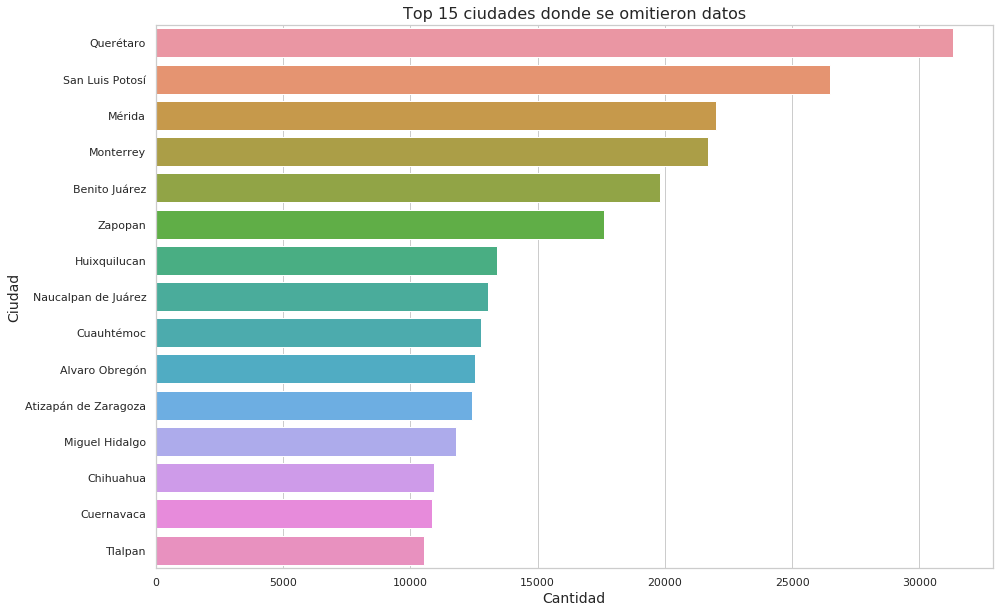

In [9]:
#Comenzamos a darnos cuenta que San Luis Potosí es una de las ciudades que más campos vacios deja.
#Veamos ahora en un marco más general. 
#Vemos que la ciudad que mas datos omitio en realidad es Querétaro.

def sumNuls (x):
    return x.isnull().sum()

dfNullTot = df.groupby('ciudad').apply(sumNuls).apply(np.sum,axis=1).reset_index()
dfNullTot.rename(columns={0:'cantidad'}, inplace=True)
dfNullTot=dfNullTot.sort_values(by='cantidad', ascending=False)[0:15]

plt.figure(figsize=(15, 10))
g = sns.barplot(x=dfNullTot['cantidad'], y=dfNullTot['ciudad'], orient='h')
g.set_title("Top 15 ciudades donde se omitieron datos", fontsize=16)
g.set_xlabel("Cantidad", fontsize=14)
g.set_ylabel("Ciudad", fontsize=14)


Text(0, 0.5, 'Ciudad')

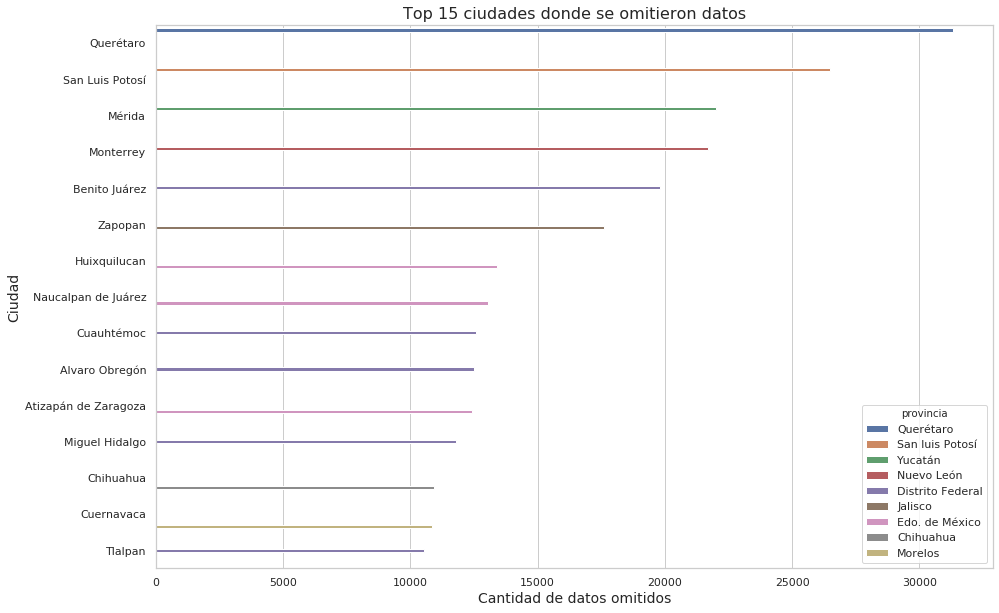

In [10]:
#Comenzamos a darnos cuenta que San Luis Potosí es una de las ciudades que más campos vacios deja.
#Veamos ahora en un marco más general. 
#Vemos que la ciudad que mas datos omitio en realidad es Querétaro.

dfNullTot = df.groupby(['provincia','ciudad']).agg({'nulls':'sum'}).reset_index().sort_values(by='nulls', ascending=False)[0:15]
plt.figure(figsize=(15, 10))

g = sns.barplot(x=dfNullTot['nulls'], y=dfNullTot['ciudad'], orient='h', hue=dfNullTot['provincia'], dodge=False)
g.set_title("Top 15 ciudades donde se omitieron datos", fontsize=16)
g.set_xlabel("Cantidad de datos omitidos", fontsize=14)
g.set_ylabel("Ciudad", fontsize=14)

In [11]:
# Quiero hacer un grafiquito con el total de publicaciones de cada ciudad de esas 15 que encontre
# que son las que mas nulls tienen
# La cantidad total se multiplica por 23 porque son el total de campos que pueden llenarse por vivienda.
#Vemos que san luis potosi es la ciudad que mayor porcentaje tiene de errores al ingresar datos.
ciudadesMuchoNull = list(dfNullTot.ciudad)

dfMuchoNull = df[df.ciudad.isin(ciudadesMuchoNull)]
dfMuchoNull = dfMuchoNull.groupby('ciudad').size().reset_index().rename(columns={0:'cantidadTotal'})

dfMuchoNull.cantidadTotal=dfMuchoNull.cantidadTotal*23
dfMuchoNull.sort_values(by='cantidadTotal',ascending=False, inplace=True)
dfComparacion = dfMuchoNull.merge(dfNullTot)
dfComparacion['Porcentaje']=dfComparacion['cantidad']/dfComparacion['cantidadTotal']*100
dfComparacion.sort_values(by='Porcentaje',ascending=False,inplace=True)
dfComparacion

KeyError: 'cantidad'

In [ ]:
#Veamos que provincia es la que más datos omite:
def sumNuls (x):
    return x.isnull().sum()

dfNullTot = df.groupby('provincia').apply(sumNuls).apply(np.sum,axis=1).reset_index()
dfNullTot.rename(columns={0:'cantidad'}, inplace=True)
dfNullTot=dfNullTot.sort_values(by='cantidad', ascending=False)[0:15]

plt.figure(figsize=(15, 10))
g = sns.barplot(x=dfNullTot['cantidad'], y=dfNullTot['provincia'], orient='h')
g.set_title("Top 15 Provincias donde se omitieron datos", fontsize=16)
g.set_xlabel("Cantidad", fontsize=14)
g.set_ylabel("Provincia", fontsize=14)

In [ ]:
#Vamos a analizar la cantidad de nulls por año
df['mes'] = df['fecha'].dt.month
df['ano'] = df['fecha'].dt.year



In [ ]:
dfAnualNulls = df.groupby('ano').agg({'nulls':'sum'}).reset_index()
fig, ax = plt.subplots(figsize=( 10,5))
ax.plot(dfAnualNulls['ano'], dfAnualNulls['nulls'], label='Total de Nulls', color='red')

plt.xticks([2012,2013,2014,2015,2016])
plt.grid(b=True, which='major', axis='both')
ax.set_xlabel("\n Año")
ax.set_ylabel("Nulls \n")
ax.legend(loc='best')    
ax.set_title('Cantidad de nulls por año \n', fontdict={'fontsize':20})

In [ ]:
#Hay diferencia entre ambos graficos debido a que cada publicacion puede tener mas de un campo sin llenar

dfTotPubl = df.groupby('ano').size().reset_index()
dfTotPubl.rename(columns={0:'total'}, inplace=True)

fig, ax = plt.subplots(figsize=( 15,10))
ax.plot(dfTotPubl['ano'], dfTotPubl['total'], label='Publicaciones', color='blue')
ax.plot(dfAnualNulls['ano'], dfAnualNulls['nulls'], label='Nulls', color='red')

plt.xticks([2012,2013,2014,2015,2016])
plt.grid(b=True, which='major', axis='both')
ax.set_xlabel("\n Año", fontsize=14)
ax.set_ylabel("Cantidad \n", fontsize=14)
ax.legend(loc='best')    
ax.set_title('Publicaciones vs Nulls por año \n', fontdict={'fontsize':16})

In [ ]:
dfCorrTotPubNuls = dfTotPubl.merge(dfAnualNulls)
dfCorrTotPubNuls.corr()


In [ ]:
from collections import OrderedDict

def perform_stats(df, camposNull):
    # lo usamos para preservar el orden de insercion
    data = OrderedDict()
    
    for i in camposNull:
        data[i] = df[i].isnull().sum()

    return pd.Series(data)

dfCiudadesRadar = df.groupby('ciudad').agg({'nulls':'sum'}).sort_values(by='nulls',ascending = False)[0:5].reset_index()
print(dfCiudadesRadar.head(5))
ciudadesRadar = list(dfCiudadesRadar['ciudad'])
dfCiudadesRadar = df[df.ciudad.isin(ciudadesRadar)].groupby('ciudad').apply(perform_stats, camposNull)
dfCiudadesRadar.drop(columns=['ciudad','provincia','lng','lat'], inplace=True)

In [ ]:
Attributes = list(dfCiudadesRadar)
AttNo = len(Attributes)

ax = plt.subplot(111, polar=True)

values = dfCiudadesRadar.iloc[0].tolist()
values += values [:1]

angles = [n / float(AttNo) * 2 * pi for n in range(AttNo)]
angles += angles [:1]

#Add the attribute labels to our axes
plt.xticks(angles[:-1],Attributes)

#Plot the line around the outside of the filled area, using the angles and values calculated before
ax.plot(angles,values)

#Fill in the area plotted in the last line
ax.fill(angles, values, 'teal', alpha=0)

#Give the plot a title and show it
plt.figtext(1,1,"Benito Juarez",color="teal")
#----------------------------------------------
values = dfCiudadesRadar.iloc[1].tolist()
values += values [:1]
#Plot the line around the outside of the filled area, using the angles and values calculated before
ax.plot(angles,values)

#Fill in the area plotted in the last line
ax.fill(angles, values, 'green', alpha=0)

#Give the plot a title and show it
plt.figtext(1,0.95,"Monterrey",color="green")
#----------------------------------------------
values = dfCiudadesRadar.iloc[2].tolist()
values += values [:1]
#Plot the line around the outside of the filled area, using the angles and values calculated before
ax.plot(angles,values)

#Fill in the area plotted in the last line
ax.fill(angles, values, 'blue', alpha=0)

#Give the plot a title and show it
plt.figtext(1,0.90,"Mérida",color="blue")
#----------------------------------------------
values = dfCiudadesRadar.iloc[3].tolist()
values += values [:1]
#Plot the line around the outside of the filled area, using the angles and values calculated before
ax.plot(angles,values)

#Fill in the area plotted in the last line
ax.fill(angles, values, 'red', alpha=0)

#Give the plot a title and show it
plt.figtext(1,0.85,"Querétaro",color="red")
#----------------------------------------------
values = dfCiudadesRadar.iloc[4].tolist()
values += values [:1]
#Plot the line around the outside of the filled area, using the angles and values calculated before
ax.plot(angles,values)

#Fill in the area plotted in the last line
ax.fill(angles, values, 'darkorchid', alpha=0)

#Give the plot a title and show it
plt.figtext(1,0.80,"San Luis Potosí",color="darkorchid")

ax.set_title('Campos vacíos de las 5 que más datos omitieron \n\n', fontdict={'fontsize':16})

plt.show()

In [ ]:
#Investiguemos de las ciudades que mas nulls tienen, los tipos de propiedades donde mas datos se omiten
dfNulsProp = df[df.ciudad.isin(ciudadesRadar)].groupby(['ciudad','tipodepropiedad']).agg({'nulls':'sum'})
dfNulsProp.reset_index(inplace=True)

newDf = pd.DataFrame(columns=dfNulsProp.columns)

for i in ciudadesRadar: 
     newDf = newDf.append(dfNulsProp[dfNulsProp.ciudad == i].sort_values(by="nulls", ascending=False)[0:4])

plt.figure(figsize=(10, 10))
g = sns.barplot(x=newDf['tipodepropiedad'], y=newDf['nulls'], hue=newDf['ciudad'])
g.set_title("Cantidad de propiedades en estas ciudades", fontsize=16)
g.set_xlabel("Tipo de Propiedad", fontsize=14)
g.set_ylabel("Cantidad de Nulos", fontsize=14)

In [ ]:
#Vamo a hacer un heatmap con los tipos de propiedad como columnas y como indice de filas la antiguedad y la direccion
#Cada celda va a tener la cantidad de nulls
#Los datos se van a sacar de agrupar estas 5 ciudades que mas nulls omitieron
dfHeat = df[df.ciudad.isin(ciudadesRadar)]
dfHeat.tipodepropiedad.value_counts()
dfHeat = dfHeat[dfHeat.antiguedad.isnull() | dfHeat.direccion.isnull() | dfHeat.metrostotales.isnull()
                | dfHeat.idzona.isnull() | dfHeat.banos.isnull() | dfHeat.habitaciones.isnull()]
dfHeat.tipodepropiedad.value_counts()

def nulsAntyDir(df):
    # lo usamos para preservar el orden de insercion
    data = OrderedDict()
    data['nul_antiguedad'] = df['antiguedad'].isnull().sum()
    data['nul_direccion'] = df['direccion'].isnull().sum()
    data['nul_metrostotales'] = df['metrostotales'].isnull().sum()
    data['nul_idzona'] = df['idzona'].isnull().sum()
    data['nul_banos'] = df['banos'].isnull().sum()
    data['nul_habitaciones'] = df['habitaciones'].isnull().sum()

    return pd.Series(data)
print(dfHeat.antiguedad.isnull().sum())
print(dfHeat.direccion.isnull().sum())
dfHeat = dfHeat.groupby('tipodepropiedad').apply(nulsAntyDir).sort_values(by='nul_direccion', ascending = False)[0:10]
dfHeat = dfHeat.reset_index()
tiposDePropiedadesHeat = list(dfHeat.index)
print(tiposDePropiedadesHeat)

In [ ]:
dfHeat

In [ ]:
#Vamos a intentar mejorar el grafico anterior ajustando la escala volviendola porcentual
dfHeatTotales = df[df.ciudad.isin(ciudadesRadar)]
dfHeatTotales = dfHeatTotales.groupby('tipodepropiedad').agg({'idzona':'size'}).reset_index()
dfHeatTotales = dfHeatTotales[dfHeatTotales.index.isin(tiposDePropiedadesHeat)]
dfHeatTotales = dfHeatTotales.rename(columns={'idzona':'cantidadTotal'})
dfHeatTotales=dfHeatTotales.merge(dfHeat)
dfHeatTotales.set_index('tipodepropiedad', inplace=True)
dfHeatTotales

In [ ]:

dfHeatTotales['Nulls antiguedad'] = dfHeatTotales.nul_antiguedad/dfHeatTotales.cantidadTotal
dfHeatTotales['Nulls direccion'] = dfHeatTotales.nul_direccion/dfHeatTotales.cantidadTotal
dfHeatTotales['Nulls metrostotales'] = dfHeatTotales.nul_metrostotales/dfHeatTotales.cantidadTotal
dfHeatTotales['Nulls idzona'] = dfHeatTotales.nul_idzona/dfHeatTotales.cantidadTotal
dfHeatTotales['Nulls banos'] = dfHeatTotales.nul_banos/dfHeatTotales.cantidadTotal
dfHeatTotales['Nulls habitaciones'] = dfHeatTotales.nul_habitaciones/dfHeatTotales.cantidadTotal
dfHeatTotales.drop(columns={'cantidadTotal','nul_antiguedad','nul_metrostotales','nul_direccion','nul_idzona','nul_banos','nul_habitaciones'}
                   , inplace=True)


In [ ]:
plt.figure(figsize=(15, 10))
cmap = sns.diverging_palette(200, 250, as_cmap=True)
ax=sns.heatmap(dfHeatTotales,
            cmap='Greens')
ax.set_facecolor('xkcd:grey')
ax.set_title('Porcentaje de nulos según tipo de propiedad \n', fontdict={'fontsize':20})
ax.set_xlabel('')
ax.set_ylabel('')

In [ ]:
df[df.tipodepropiedad == 'Edificio']

In [ ]:
#dfAnos = df.groupby(['provincia','ciudad','ano', 'nulls']).size().reset_index()
dfAnos = df.groupby(['provincia','ano']).agg({'nulls':'sum'}).reset_index()

dfAnos = dfAnos.merge(df.groupby(['provincia','ano']).size().reset_index())
dfAnos.rename(columns={0:'TotalPubl'}, inplace=True)
provincias = dfAnos.provincia.tolist()

In [ ]:
fig, ax = plt.subplots(figsize=( 15,10))
setLabels = 0
for i in provincias:
    label = ""

    if(setLabels == 0):
        ax.plot(dfAnos[dfAnos['provincia']== i ].ano, dfAnos[dfAnos['provincia']== i ].TotalPubl, color='blue', label='Publicaciones')
        ax.plot(dfAnos[dfAnos['provincia']== i ].ano, dfAnos[dfAnos['provincia']== i ].nulls, color='red',label='Campos No Completados')
        setLabels = 1
    else:
        ax.plot(dfAnos[dfAnos['provincia']== i ].ano, dfAnos[dfAnos['provincia']== i ].TotalPubl, color='blue')
        ax.plot(dfAnos[dfAnos['provincia']== i ].ano, dfAnos[dfAnos['provincia']== i ].nulls, color='red')

plt.xticks([2012,2013,2014,2015,2016])
plt.grid(b=True, which='major', axis='both')
ax.set_xlabel("\n Año", fontsize=14)
ax.set_ylabel("Cantidad \n", fontsize=14)
ax.legend(loc='best')    
ax.set_title('Publicaciones vs Nulls por año por provincia \n', fontdict={'fontsize':16})

In [ ]:
dfAnos[dfAnos['provincia']=='Distrito Federal'].nulls